# Introduction 

The plant Growth dataset. 


In [41]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import zscore
from scipy.stats import anderson
from scipy.stats import levene



In [42]:
df = pd.read_csv('PlantGrowth.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [44]:
df.dtypes

rownames      int64
weight      float64
group        object
dtype: object

In [45]:
df.isnull()

,rownames,weight,group
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [46]:
df.drop(columns=['rownames'], inplace=True)

# describe dataset
df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [47]:
df.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


# Breakdown of data set 

 weight

A numeric variable representing the weight of plants after a certain period of growth. and has a Continuous numerical variable. the values  represents the biomass or size of plant samples.

group

A categorical variable representing different experimental conditions. There are three categories here
1. ctrl: The control group, which doesn’t receive any special treatment.
2. trt1: The first treatment group.
3. trt2: The second treatment group.

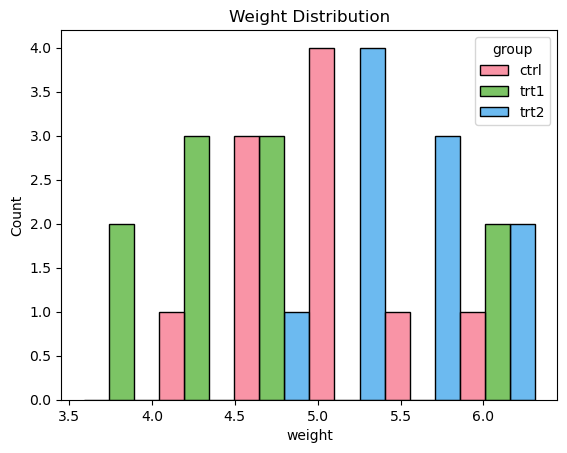

In [141]:
sns.histplot(data=df, x=df['weight'], hue='group', multiple="dodge", palette='husl').set_title('Weight Distribution')
plt.show()

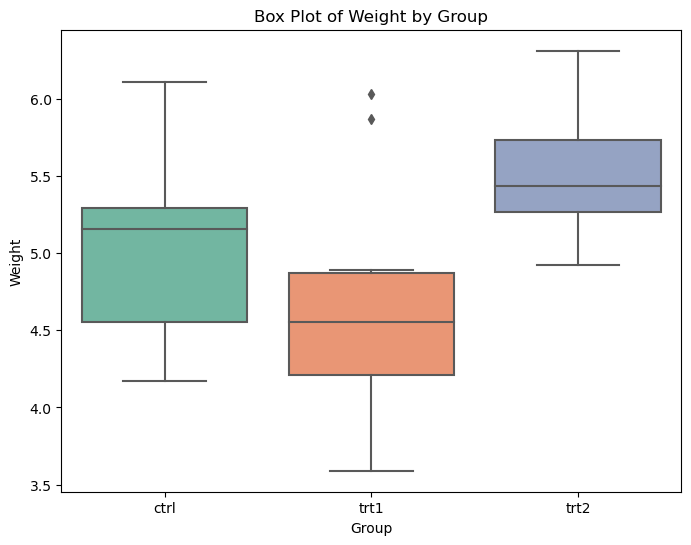

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df, palette='Set2')
plt.title("Box Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

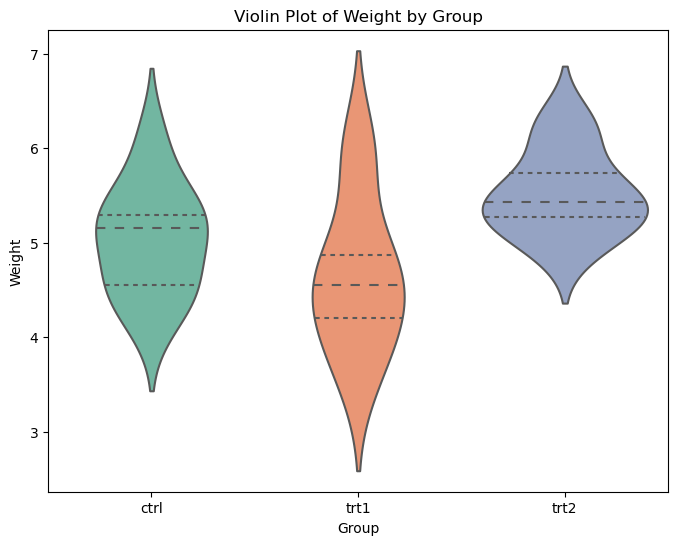

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='group', y='weight', data=df, palette='Set2', inner="quartile")
plt.title("Violin Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

C:\Users\keith\AppData\Local\Temp\ipykernel_9984\4075154964.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='group', y='weight', data=df, palette='husl')


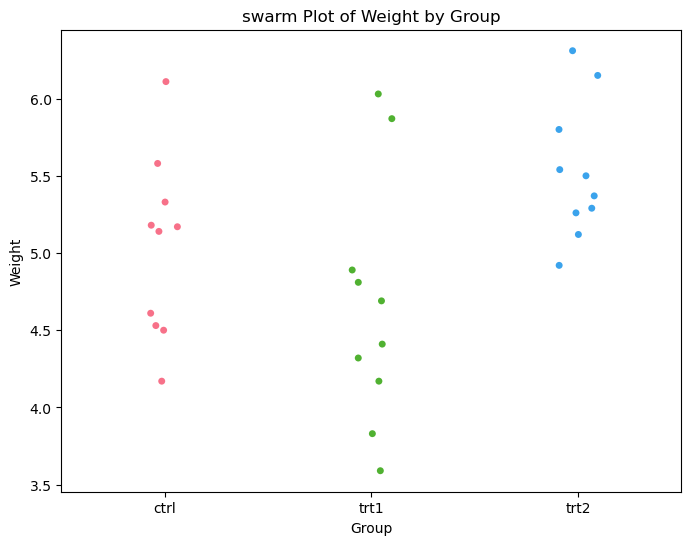

In [219]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='group', y='weight', data=df, palette='husl')
plt.title("swarm Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

<Figure size 1000x600 with 0 Axes>

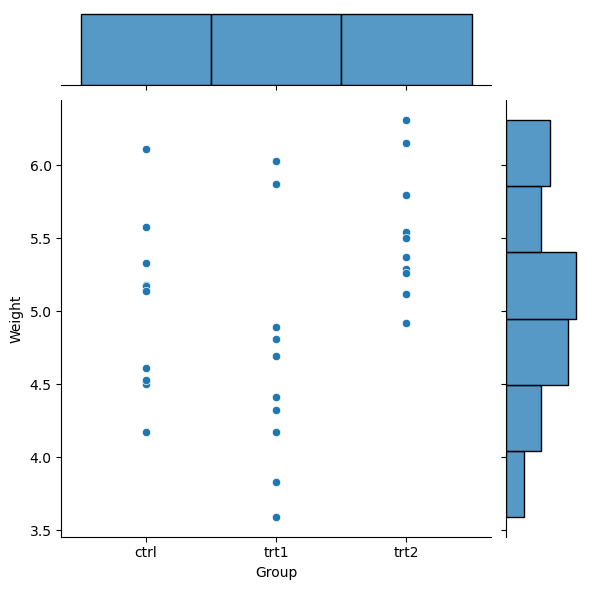

In [220]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='group', y='weight', data=df, palette='husl')
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

In [221]:
ctrl_weight = df[df['group'] == 'ctrl']['weight']
trt1_weight = df[df['group'] == 'trt1']['weight']
trt2_weight = df[df['group'] == 'trt2']['weight']

# treating outliers 

As we can see from the above plots there are seems to be outliers in trt1 so going to run some tests to confirm this and remove these from out dataset.  

In [222]:
def find_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr 
    upper_bound = q3 + 1.5 * iqr 
    return data[(data < lower_bound) | (data > upper_bound)]

print("Outliers based on IQR:")

for group in df['group'].unique():
    group_data = df[df['group'] == group]['weight']
    outliers = find_outliers_iqr(group_data)
    print(f"{group} group outliers:\n{outliers.values}\n")

# 2. Using Z-Score for Outlier Detection


print("Outliers based on Z-Score:")

for group in df['group'].unique():
    group_data = df[df['group'] == group]['weight']
    z_scores = zscore(group_data)
    outliers = group_data[np.abs(z_scores) > 3]
    print(f"{group} group outliers:\n{outliers.values}\n")
    

Outliers based on IQR:
ctrl group outliers:
[]

trt1 group outliers:
[5.87 6.03]

trt2 group outliers:
[]

Outliers based on Z-Score:
ctrl group outliers:
[]

trt1 group outliers:
[]

trt2 group outliers:
[]



In [223]:

outliers_to_remove = [5.87, 6.03]

# Filter out these specific outliers in the 'trt1' group
df_cleaned = df[~((df['group'] == 'trt1') & (df['weight'].isin(outliers_to_remove)))]

# Verify the result
print("Updated dataset after removing outliers from trt1 group:")
print(df_cleaned['group'].value_counts())

Updated dataset after removing outliers from trt1 group:
group
ctrl    10
trt2    10
trt1     8
Name: count, dtype: int64


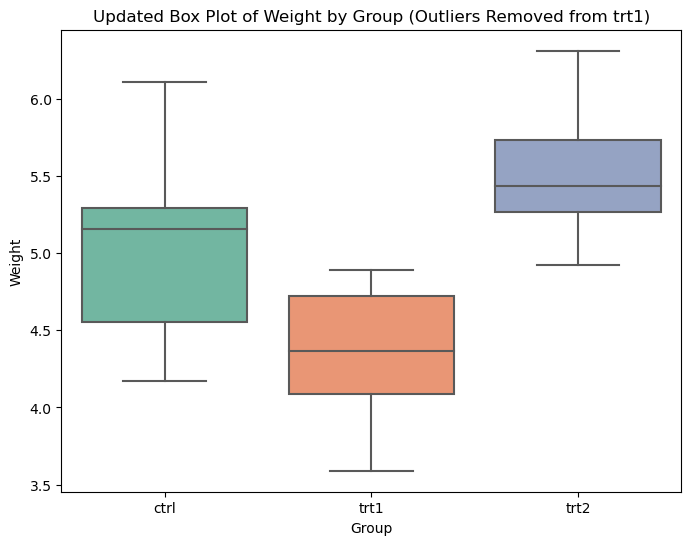

In [224]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df_cleaned, palette='Set2')
plt.title("Updated Box Plot of Weight by Group (Outliers Removed from trt1)")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

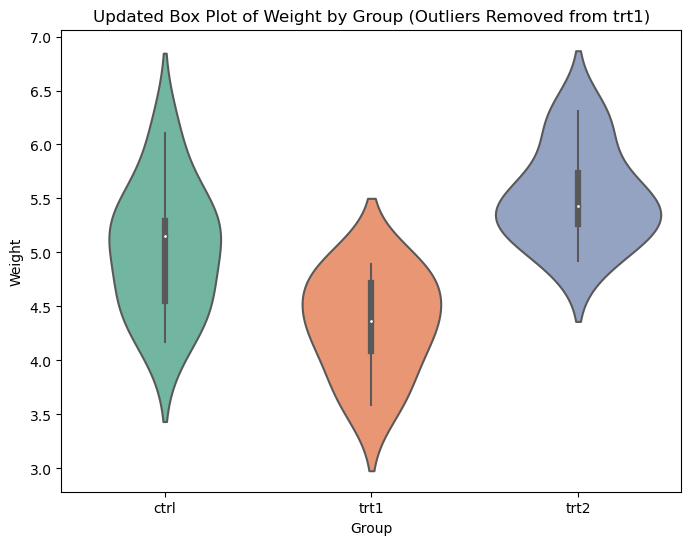

In [225]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='group', y='weight', data=df_cleaned, palette='Set2')
plt.title("Updated Box Plot of Weight by Group (Outliers Removed from trt1)")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

# testing distubution 

In [226]:
# Perform Shapiro-Wilk test for normality on each group
print("Shapiro-Wilk Test for Normality:")

# Control group
stat, p_value = shapiro(ctrl_weight)
print(f"Control Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Control group follows a normal distribution.\n")
else:
    print("Control group does not follow a normal distribution.\n")

# Treatment 1 group
stat, p_value = shapiro(trt1_weight)
print(f"Treatment 1 Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Treatment 1 group follows a normal distribution.\n")
else:
    print("Treatment 1 group does not follow a normal distribution.\n")

# Treatment 2 group
stat, p_value = shapiro(trt2_weight)
print(f"Treatment 2 Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Treatment 2 group follows a normal distribution.\n")
else:
    print("Treatment 2 group does not follow a normal distribution.\n")

Shapiro-Wilk Test for Normality:
Control Group: Shapiro-Wilk Statistic = 0.9567, p-value = 0.7475
Control group follows a normal distribution.

Treatment 1 Group: Shapiro-Wilk Statistic = 0.9304, p-value = 0.4519
Treatment 1 group follows a normal distribution.

Treatment 2 Group: Shapiro-Wilk Statistic = 0.9410, p-value = 0.5643
Treatment 2 group follows a normal distribution.



In [227]:
# Perform KS tests between each pair of groups
print("Kolmogorov-Smirnov Test Results:")
stat, p_value = ks_2samp(ctrl_weight, trt1_weight)
print(f"Control vs Treatment 1: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
     print("No significant difference in distribution between Control and Treatment 1.\n")
else:
    print("Significant difference in distribution between Control and Treatment 1.\n")

# Control vs Treatment 2
stat, p_value = ks_2samp(ctrl_weight, trt2_weight)
print(f"Control vs Treatment 2: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("No significant difference in distribution between Control and Treatment 2.\n")
else:
    print("Significant difference in distribution between Control and Treatment 2.\n")

# Treatment 1 vs Treatment 2
stat, p_value = ks_2samp(trt1_weight, trt2_weight)
print(f"Treatment 1 vs Treatment 2: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("No significant difference in distribution between Treatment 1 and Treatment 2.\n")
else:
    print("Significant difference in distribution between Treatment 1 and Treatment 2.\n")

Kolmogorov-Smirnov Test Results:
Control vs Treatment 1: KS Statistic = 0.4000, p-value = 0.4175
No significant difference in distribution between Control and Treatment 1.

Control vs Treatment 2: KS Statistic = 0.5000, p-value = 0.1678
No significant difference in distribution between Control and Treatment 2.

Treatment 1 vs Treatment 2: KS Statistic = 0.8000, p-value = 0.0021
Significant difference in distribution between Treatment 1 and Treatment 2.



# T tests 

In this project one of the areas we will be looking at is t tests. A t test is a method used to find the difference in the means between two groups and how these groups are related. for example if we wanted to look at the number of smoker and non smokers in a givng group we could use a t test to compare these. The outcome of these tests is known as the T value.

Types of t tests 
One Sample t-test 

In [228]:

import  scipy.stats as stats 
data = [300, 315, 320, 311, 314, 309, 300, 308, 305, 301, 303]

stats.ttest_1samp(a=data, popmean=310)



TtestResult(statistic=-1.0791558906442464, pvalue=0.30585914629755523, df=10)

Two Sample t-test

In [229]:
sample1 = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]
sample2 = [335, 329, 322, 321, 324, 319, 304, 308, 305, 311, 307, 300, 305]

#perform two sample t-test
stats.ttest_ind(a=sample1, b=sample2) 

TtestResult(statistic=-2.10090292575557, pvalue=0.04633501389516513, df=24.0)